In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
import os
from sklearn.utils import shuffle


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv("BBC News.csv")

In [ ]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
df.shape

(1490, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [ ]:
df['Category'].value_counts()

,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


In [ ]:
target_category = df['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [ ]:
df['CategoryId'] = df['Category'].factorize()[0]
df.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [ ]:
filter = df[df['CategoryId'] == 2]
filter

,ArticleId,Text,Category,CategoryId
5,1582,howard truanted to play snooker conservative...,politics,2
10,1683,blair rejects iraq advice calls tony blair has...,politics,2
28,1527,uk will stand firm on eu rebate britain s £3b...,politics,2
33,2100,security papers found in street an inquiry i...,politics,2
52,1763,mps quiz aides over royal income senior offici...,politics,2
...,...,...,...,...
1456,955,blair told to double overseas aid tony blair i...,politics,2
1463,2102,abbas will not tolerate attacks palestinian ...,politics,2
1472,1806,kelly trails new discipline power teachers cou...,politics,2
1475,980,budget to set scene for election gordon brown ...,politics,2


In [ ]:
d  = df[df['Category'] == 'sport']
d

,ArticleId,Text,Category,CategoryId
6,651,wales silent on grand slam talk rhys williams ...,sport,3
14,707,ireland 21-19 argentina an injury-time dropped...,sport,3
15,1588,wenger signs new deal arsenal manager arsene w...,sport,3
17,486,hantuchova in dubai last eight daniela hantuch...,sport,3
18,1344,melzer shocks agassi in san jose second seed a...,sport,3
...,...,...,...,...
1467,937,charvis set to lose fitness bid flanker colin ...,sport,3
1468,454,preview: ireland v england (sun) lansdowne roa...,sport,3
1471,1870,ferrero eyes return to top form former world n...,sport,3
1473,304,dallaglio eyeing lions tour place former engla...,sport,3


Exploratory Data Analysis(EDA)


In [ ]:
category = df[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


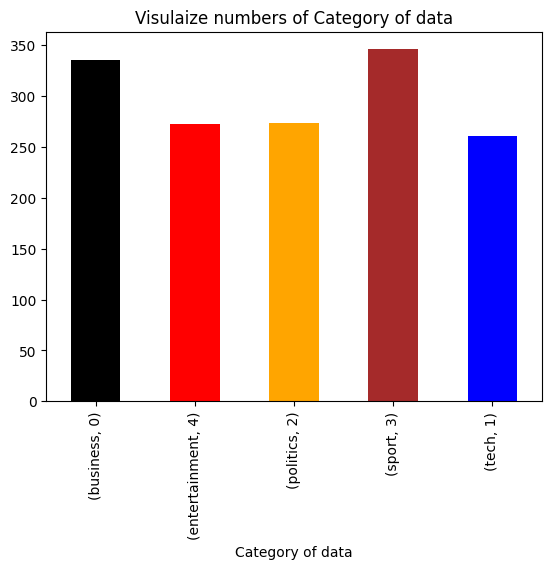

In [ ]:
df.groupby('Category').CategoryId.value_counts().plot(kind = 'bar',color = ['black','red','orange','brown','blue'])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()


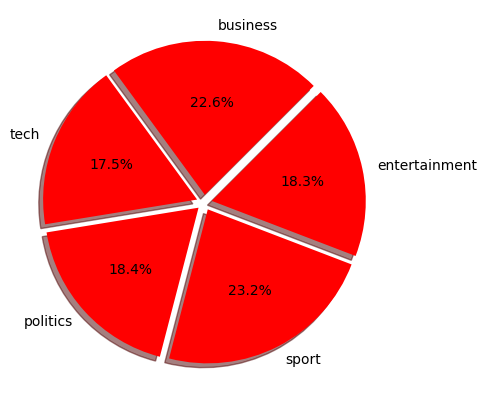

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = ["red"]
business = df[df['CategoryId'] == 0 ]
tech = df[df['CategoryId'] == 1 ]
politics = df[df['CategoryId'] == 2]
sport = df[df['CategoryId'] == 3]
entertainment = df[df['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

business related words:


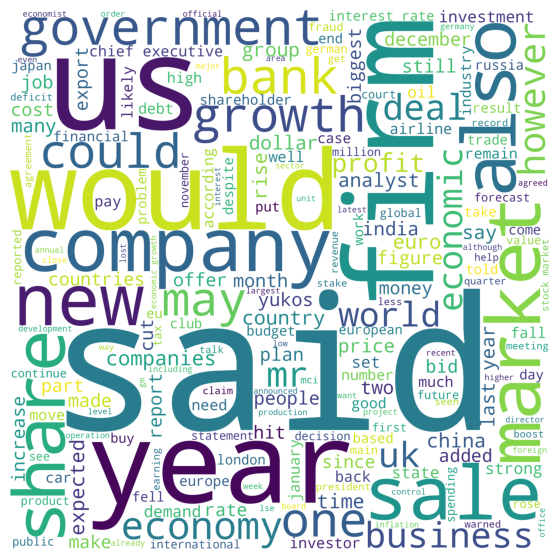

tech related words:


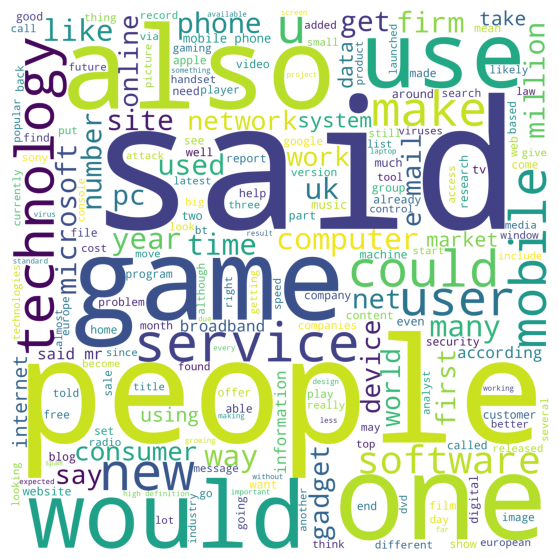

politics related words:


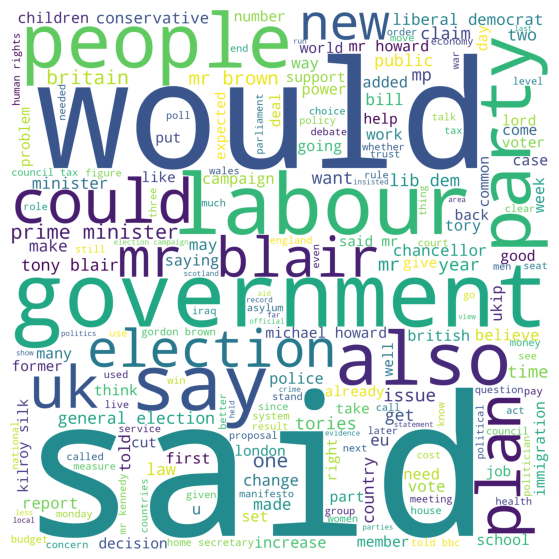

sport related words:


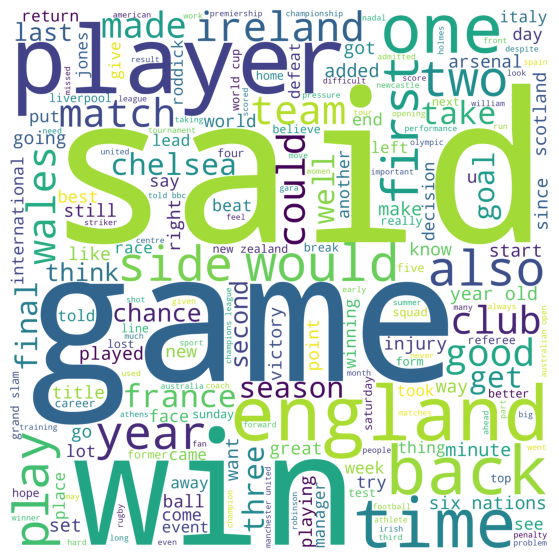

entertainment related words:


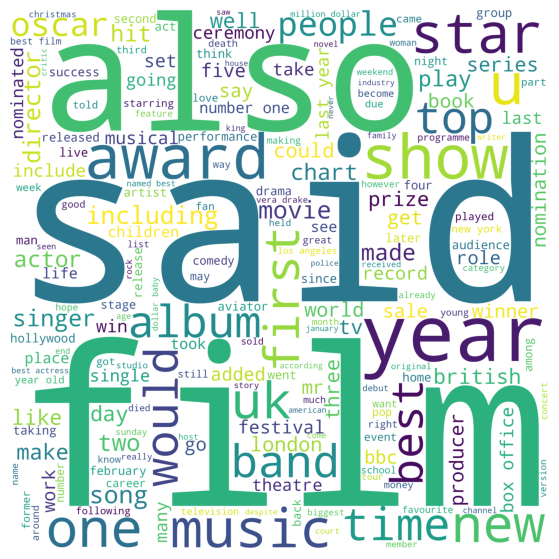

In [ ]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = df[df['CategoryId'] == 0]

business = business['Text']

tech = df[df['CategoryId'] == 1]

tech = tech['Text']

politics = df[df['CategoryId'] == 2]

politics = politics['Text']

sport = df[df['CategoryId'] == 3]

sport = sport['Text']

entertainment = df[df['CategoryId'] == 4]

entertainment = entertainment['Text']

def wordcloud_draw(df, color = 'white'):

  words = ' '.join(df)

  cleaned_word = ' '.join([word for word in words.split()

                        if (word != 'news' and word != 'text')])

  wordcloud = WordCloud(stopwords = stop,background_color = 'white',width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))

  plt.imshow(wordcloud)

  plt.axis("off")

  plt.show()

print("business related words:")

wordcloud_draw(business, 'white')

print("tech related words:")

wordcloud_draw(tech, 'white')

print("politics related words:")

wordcloud_draw(politics, 'white')

print("sport related words:")

wordcloud_draw(sport, 'white')

print("entertainment related words:")

wordcloud_draw(entertainment, 'white')



In [ ]:
!pip install beautifulsoup4


Removing HTML tags

In [ ]:
def contains_html_tags(Text):

    return bool(re.search(r'<[^>]+>', Text))

In [ ]:
def remove_html_tags(Text):
    """Removes HTML tags from a given text string, preserving special characters."""
    soup = BeautifulSoup(Text, "html.parser")
    for data in soup(['style', 'script']):  # Remove unwanted tags
        data.decompose()

    text = ' '.join(soup.stripped_strings)  # Extract text with preserved special chars
    return text
    print(text)


In [ ]:
text = df["Text"]
text.head(10)

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
5,howard truanted to play snooker conservative...
6,wales silent on grand slam talk rhys williams ...
7,french honour for director parker british film...
8,car giant hit by mercedes slump a slump in pro...
9,fockers fuel festive film chart comedy meet th...


In [ ]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
df['Text'] = df['Text'].apply(remove_tags)

In [ ]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
df['Text'] = df['Text'].apply(special_char)
df['Text'][1]

'germanbusinessconfidenceslidegermanbusinessconfidencefellfebruaryknockinghopespeedyrecoveryeuropelargesteconomymunichbasedresearchinstituteifosaidconfidenceindexfell955february975januaryfirstdeclinethreemonthstudyfoundoutlookmanufacturingretailsectorworsenedobserverhopingconfidentbusinesssectorwouldsignaleconomicactivitypickingsurprisedifoindextakenknocksaiddzbankeconomistberndweidensteinermainreasonprobablydomesticeconomystillweakparticularlyretailtradeeconomylabourministerwolfgangclementcalleddipfebruaryifoconfidencefiguremilddeclinesaiddespiteretreatindexremainedrelativelyhighlevelexpectedmodesteconomicupswingcontinuegermanyeconomygrew16lastyearshrinking2003howevereconomycontracted02lastthreemonth2004mainlyduereluctanceconsumerspendlatestindicationgrowthstillprovingelusiveifopresidenthanwernersinnsaidimprovementgermandomesticdemandsluggishexportkeptthinggoingfirsthalf2004demandexporthitvalueeurohitrecordlevelmakinggermanproductlecompetitiveoverseastopunemploymentratestuckclose10man

Converting the text into Lower Case

In [ ]:
def convert_lower(text):
   return text.lower()
df['Text'] = df['Text'].apply(convert_lower)
df['Text'][1]

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

Remove all stop words

In [ ]:
def remove_stopwords(text):
  text = " ".join(text) if isinstance(text, list) else text
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
df['Text'] = df['Text'].apply(remove_stopwords)
df['Text'][1]

['german',
 'business',
 'confidence',
 'slide',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hope',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'month',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sector',
 'worsened',
 'observer',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'retrea

Lemmatization

In [ ]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df['Text'] = df['Text'].apply(lemmatize_word)
df['Text'][2]

'bbc poll indicates economic gloom citizen majority nation surveyed bbc world service poll believe world economy worsening respondent also said national economy getting worse asked family financial outlook majority 14 country said positive future almost 23 000 people 22 country questioned poll mostly conducted asian tsunami disaster poll found majority plurality people 13 country believed economy going downhill compared respondent nine country believed improving surveyed three country split percentage term average 44 respondent country said world economy getting worse compared 34 said improving similarly 48 pessimistic national economy 41 optimistic 47 saw family economic condition improving 36 said getting worse poll 22 953 people conducted international polling firm globescan together program international policy attitude pipa university maryland world economy picked difficult time year ago people seem fully absorbed development though personally experiencing effect said pipa directo

Stemming

In [ ]:
def stem_words(text):

    # Initialize PorterStemmer
    ps = PorterStemmer()

    # Check if text is a list or string
    if isinstance(text, str):
        text = word_tokenize(text)  # Tokenize if it's a string

    # Stem each word in the list
    stemmed_words = [ps.stem(word) for word in text]

    return stemmed_words

# Assuming you have your DataFrame 'df' with the 'Text' column:
df['Text'] = df['Text'].apply(stem_words)
df['Text'][1]

['germanbusinessconfidenceslidegermanbusinessconfidencefellfebruaryknockinghopespeedyrecoveryeuropelargesteconomymunichbasedresearchinstituteifosaidconfidenceindexfell955february975januaryfirstdeclinethreemonthstudyfoundoutlookmanufacturingretailsectorworsenedobserverhopingconfidentbusinesssectorwouldsignaleconomicactivitypickingsurprisedifoindextakenknocksaiddzbankeconomistberndweidensteinermainreasonprobablydomesticeconomystillweakparticularlyretailtradeeconomylabourministerwolfgangclementcalleddipfebruaryifoconfidencefiguremilddeclinesaiddespiteretreatindexremainedrelativelyhighlevelexpectedmodesteconomicupswingcontinuegermanyeconomygrew16lastyearshrinking2003howevereconomycontracted02lastthreemonth2004mainlyduereluctanceconsumerspendlatestindicationgrowthstillprovingelusiveifopresidenthanwernersinnsaidimprovementgermandomesticdemandsluggishexportkeptthinggoingfirsthalf2004demandexporthitvalueeurohitrecordlevelmakinggermanproductlecompetitiveoverseastopunemploymentratestuckclose10ma

In [ ]:
pip install pyspellchecker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 75.9 MB/s eta 0:00:00


POS Tagging

In [ ]:
from nltk import pos_tag

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag as nltk_pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
words = df['Text'].head(3)


words = [' '.join(map(str, sublist)) for sublist in words.tolist()]
pos_tags = nltk_pos_tag(words)
# Displaying the PoS tagged result in separate lines
print("Original Text:")
print(words)

print("\nPoS Tagging Result:")
for word, pos_tag in pos_tags:
    print(f"{word}: {pos_tag}")

Original Text:
['worldcomexboslaunchdefencelawyerdefendingformerworldcomchiefbernieebbersbatteryfraudchargecalledcompanywhistleblowerfirstwitnesscynthiacooperworldcomexheadinternalaccountingalerteddirectorirregularaccountingpracticeutelecomgiant2002warningledcollapsefirmfollowingdiscovery11bn57bnaccountingfraudmrebberspleadedguiltychargefraudconspiracyprosecutionlawyerarguedmrebbersorchestratedseriesaccountingtrickworldcomorderingemployeehideexpenseinflaterevenuemeetwallstreetearningsestimatecooperrunconsultingbusinesstoldjurynewyorkwednesdayexternalauditorarthurandersenapprovedworldcomaccountingearly20012002saidandersengivengreenlightprocedurepracticeusedworldcommrebberlawyersaidunawarefraudarguingauditoralertproblemcooperalsosaidshareholdermeetingmrebbersoftenpassedtechnicalquestioncompanyfinancechiefgivingbriefanswerprosecutionstarwitnessformerworldcomfinancialchiefscottsullivansaidmrebbersorderedaccountingadjustmentfirmtellinghitbookhowevercoopersaidmrsullivanmentionedanythinguncom

Feature Engineering

In [ ]:
x = df['Text']
y = df['CategoryId']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df.iloc[:,0].values)
y = np.array(df.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
df['Text'] = df['Text'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else tokens)
x = cv.fit_transform(df.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 1436)
y.shape =  (1490,)
